In [78]:
import warnings
warnings.filterwarnings('ignore')
import torch
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from torch import nn

In [79]:
song_data = pd.read_csv("./data/song_data.csv")
display(song_data)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [80]:
features = song_data.drop(columns=['song_name', 'song_popularity'])
targets = song_data[['song_popularity']] 
display(features.head())
display(targets.head())

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


,song_popularity
0,73
1,66
2,76
3,74
4,56


In [81]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.3)

In [82]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print(x_train.dtypes)

(13184, 13) (5651, 13) (13184, 1) (5651, 1)
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object


In [83]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([13184, 13]) torch.Size([5651, 13]) torch.Size([13184, 1]) torch.Size([5651, 1])


In [94]:
class LinearRegressionModel(nn.Module):
    '''
    Initializes weight randomly and gets trained via train method.
    '''
    def __init__(self, optimizer):
        super().__init__()
        self.optimizer = optimizer

        # initialize weights randomly and bias
        self.weights = nn.Parameter(torch.randn(13, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)


    def forward(self, x: torch.Tensor) -> torch.Tensor:
        '''
        Linear regression formula y = b0 + b1x1 + ... bnxn
        '''
        return (torch.matmul(x, self.weights) + self.bias).squeeze()
    
    
    def train_model(
            self,
            epochs: int,
            x_train: torch.Tensor,
            x_test: torch.Tensor,
            y_train: torch.Tensor,
            y_test: torch.Tensor,
            lr: float
            ) -> None:
        '''
        Trains linear model and evaluates the model against test set for every epoch.
        '''
        torch.manual_seed(0)
        # create empty loss lists
        self.train_loss_values = []
        self.test_loss_values = []

        loss_fn = nn.MSELoss() # nn.L1Loss()

        if self.optimizer == 'SGD':
            optimizer = torch.optim.SGD(params=self.parameters(), lr=lr)
        elif self.optimizer == 'Adam':
            optimizer = torch.optim.Adam(params=self.parameters(), lr=lr)

        for epoch in range(epochs):
            # set training mode
            self.train()
            # pass data through model
            y_pred = self.forward(x_train)
            # mean absolute error
            loss = loss_fn(y_pred, y_train)
            # set the gradients to zero
            optimizer.zero_grad()
            # backward pass
            loss.backward()
            # update model params
            optimizer.step()

            # Set the model in evaluation mode
            self.eval()
            with torch.no_grad():
                self.evaluate(x_test, y_test, epoch, loss_fn, loss)

        self.plot_loss()


    def evaluate(self, x_test, y_test, epoch_n, loss_fn, train_loss):
        '''
        Evaluates current epoch performance on the test set.
        '''
        test_pred = self.forward(x_test)
        test_loss = loss_fn(test_pred, y_test) #.type(torch.float)

        if epoch_n % 10 == 0:
            self.train_loss_values.append(train_loss.detach().numpy())
            self.test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch_n} - MAE Train Loss: {train_loss} - MAE Test Loss: {test_loss}")


    def plot_loss(self):
        plt.figure(figsize=(5,5))
        plt.plot(self.train_loss_values, label='train loss')
        plt.plot(self.test_loss_values, label='test loss')

        # plt.xlabel('X-axis')
        # plt.ylabel('Y-axis')
        plt.legend()
        plt.show()

Epoch: 0 - MAE Train Loss: 3179.475830078125 - MAE Test Loss: 3083.344482421875
Epoch: 10 - MAE Train Loss: 2281.853759765625 - MAE Test Loss: 2220.997314453125
Epoch: 20 - MAE Train Loss: 1683.135498046875 - MAE Test Loss: 1644.6624755859375
Epoch: 30 - MAE Train Loss: 1283.672119140625 - MAE Test Loss: 1259.248779296875
Epoch: 40 - MAE Train Loss: 1017.1023559570312 - MAE Test Loss: 1001.3611450195312
Epoch: 50 - MAE Train Loss: 839.1925659179688 - MAE Test Loss: 828.6959228515625
Epoch: 60 - MAE Train Loss: 720.4432373046875 - MAE Test Loss: 713.007568359375
Epoch: 70 - MAE Train Loss: 641.175537109375 - MAE Test Loss: 635.429931640625
Epoch: 80 - MAE Train Loss: 588.2589111328125 - MAE Test Loss: 583.3564453125
Epoch: 90 - MAE Train Loss: 552.9312133789062 - MAE Test Loss: 548.3609619140625
Epoch: 100 - MAE Train Loss: 529.3447265625 - MAE Test Loss: 524.8088989257812
Epoch: 110 - MAE Train Loss: 513.5963134765625 - MAE Test Loss: 508.9309997558594
Epoch: 120 - MAE Train Loss: 503.

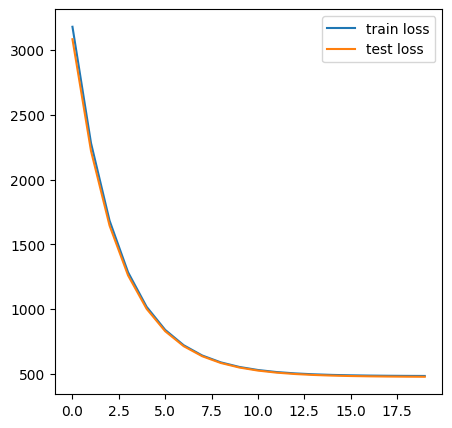

In [95]:
# SGD optimizer
sgd_model = LinearRegressionModel('SGD')
sgd_model.train_model(200, x_train, x_test, y_train, y_test, 0.01)

In [ ]:
# Adam optimizer 
adam_model = LinearRegressionModel('Adam')
adam_model.train_model(100, x_train, x_test, y_train, y_test, 0.01)

In [91]:
print(sgd_model.forward(x_test[0]))
print(y_test[0])

tensor(51.8054, grad_fn=<SqueezeBackward0>)
tensor([68.])
